<a href="https://colab.research.google.com/github/phoid/DeepLearning/blob/main/multi_class_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

# the data is alreeady split into training and test sets.
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# show the first training sample

print(f"Training sample:\n{train_data[0]}")
print(f"Training label:\n{train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# check the shape
train_data[0].shape, train_labels[9].shape

((28, 28), ())

[9 0 0 ... 3 0 5]


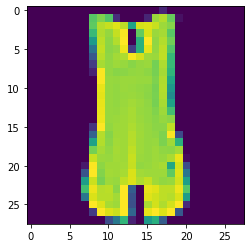

In [ ]:
# plot a single sample
import matplotlib.pyplot as plt

plt.imshow(train_data[4])

print(train_labels)

In [ ]:
train_labels[2]

0

In [ ]:
# create a small list so we can index onto our training labels to make them human readable

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

len(class_names)

10

Text(0.5, 1.0, 'Ankle Boot')

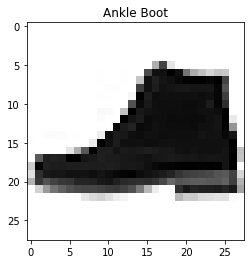

In [ ]:
# plot and example image and it's label
index = 42
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

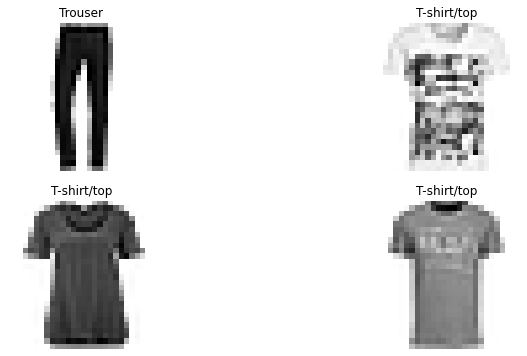

In [ ]:
# plot random number of images

import random
plt.figure(figsize=(12, 6))

for i in range(4):
  ax = plt.subplot(2,2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a milticlass model

The multiclass model will use similar architecture
some things will change however
* output shape = 10 (one per class)
* input shape = 28 x 28 (shape of one image)
* loss function = tf.kreras.losses.categoricalCrossentropy
  * if your labels are one-hot encoded, use CategoricalCrossentropy
  * if your labels are interger for m use SparseCategoricalCrossentropy
* output activation = Softmax



In [ ]:
tf.one_hot(train_labels, depth=10)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
# check thge model summart

model_11.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# check the min and max valiues of the training data

train_data.min(), train_data.max()

(0, 255)

Neural nets prefer data to be scaled (Or normalizes), this means they like to have the numbers in the tensors between zero and 1

In [ ]:
# we can get everything between zer o and one by divding by the maximum

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)]
)

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_12.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

Normalized data is preffered by neural networks. (tensors between 0 and 1)

performance will skyrocket as shown above

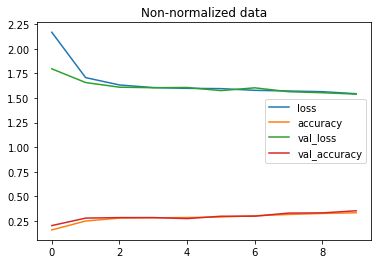

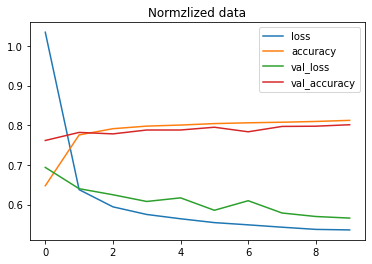

In [ ]:
import pandas as pd
# plot non-norm data loss curves

pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data curves
pd.DataFrame(norm_history.history).plot(title="Normzlized data")

The same model with even *slightly* different data can produce *dramatically* different results. When comparing models, try to change very little so that you can pinpoint what changes are making the biggest differences.

In [ ]:
## finding the ideal learning rate

tf.random.set_seed(42)

# create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

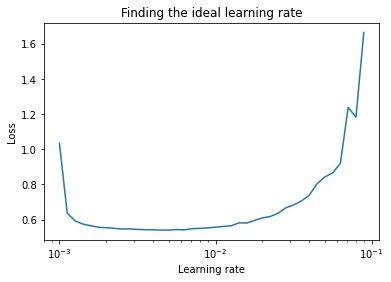

In [ ]:
# plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])

plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)]
)

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

history_14 = model_14.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Epo

## evaluating the model

To evaluate the model
* evaluate it's performance using other classification metrics (such as a cunfusion matrix)
* Assess some of its predictions (visuals)
* improve its results (trainsing for longer or modifying architecture)
* Save and export for use in a application

let's go through the top 2


In [ ]:
# create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

  # set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [ ]:
# make some predictions
y_probs = model_14.predict(test_data_norm)

# view first five predictions

y_probs

array([[8.5629975e-11, 3.5361563e-13, 2.6633756e-05, ..., 9.1868855e-02,
        4.0605278e-03, 8.0787367e-01],
       [3.4278555e-06, 1.2899265e-16, 9.5989150e-01, ..., 1.1383448e-28,
        6.3271809e-04, 4.4789640e-08],
       [6.1063060e-05, 9.9657673e-01, 4.3866976e-08, ..., 7.3237463e-18,
        5.4811604e-08, 4.9225140e-14],
       ...,
       [7.8579560e-02, 2.2294882e-05, 1.4033400e-01, ..., 2.9533834e-20,
        1.1197206e-01, 4.7600297e-09],
       [3.3110991e-05, 9.9301308e-01, 2.3392199e-07, ..., 9.3986877e-15,
        8.1592771e-07, 1.2158881e-11],
       [7.9815983e-08, 7.7578166e-10, 1.6470600e-04, ..., 4.3826181e-02,
        1.5162564e-03, 3.9120454e-02]], dtype=float32)

In [ ]:
# make predictions on the same kind of data your model was trained on

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5629975e-11, 3.5361563e-13, 2.6633756e-05, 4.6356202e-08,
        5.0949860e-05, 9.6119247e-02, 8.1778040e-08, 9.1868855e-02,
        4.0605278e-03, 8.0787367e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle Boot')

In [ ]:
y_preds = y_probs.argmax(axis=1)

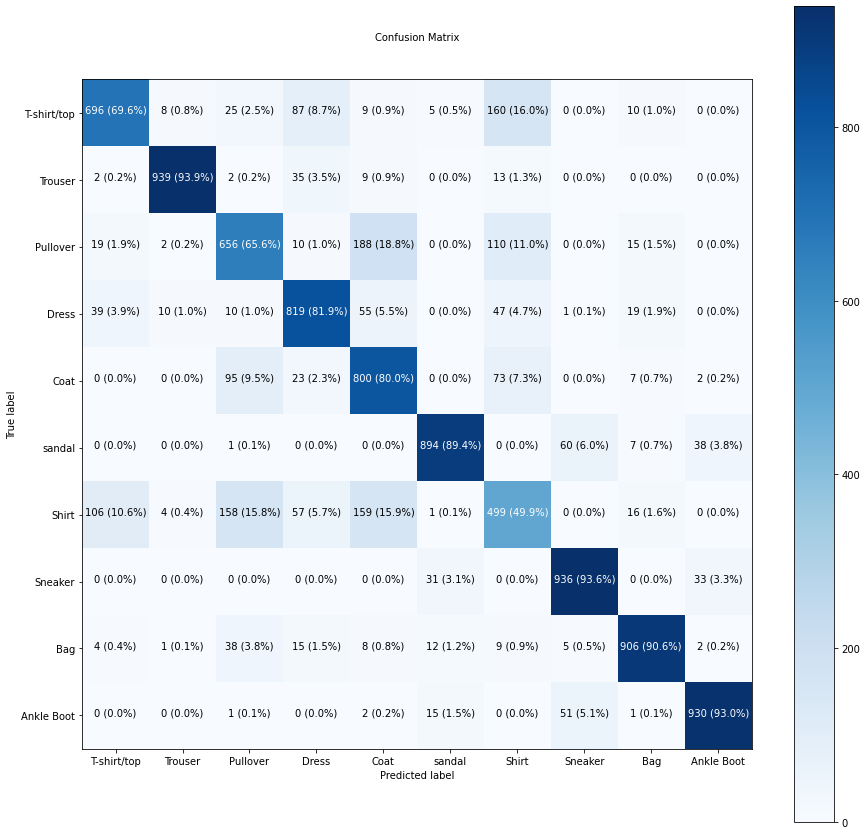

In [ ]:
make_confusion_matrix(y_pred=y_preds, y_true=test_labels, classes=class_names, figsize=(15,15), text_size=10)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

* Often wehn working with images and other visual data, it's important to visualize as much as poissible to further understand the data nd the inputs and ouputs of the models

let's craete a fun little function for:
* plot a random image
*make a predictoi on said image
* lagbel the pltot with the trusth label and the predicted label.

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random imaeg, plots it and labels it with a prediction and truth label.
  """
  # Set up a random integer
  i = random.randint(0, len(images))

  # create preditions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_labels),
             color=color)

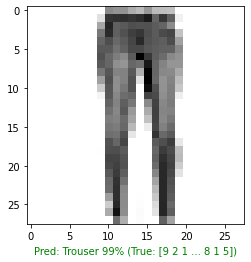

In [ ]:
# check out a random image and its prediction

plot_random_image(model=model_14,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model_14.layers

In [ ]:
# extract a particular layer

model_14.layers[1]

In [ ]:
# get the patters of a layer in our network

weights, biases = model_14.layers[1].get_weights()

# Chapes
weights, weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

Let's check out the bias vector

In [ ]:
# bias and biases shapes

biases, biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

Evry neuron has a bias vector. Each is paired with a weights matrix

the bias vecotr is initialized as zeroes.

The bias vector dictates how much the patterns within the corrsponding weightsmatrix

In [ ]:
model_14.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 4)                 3140      
                                                                 
 dense_22 (Dense)            (None, 4)                 20        
                                                                 
 dense_23 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


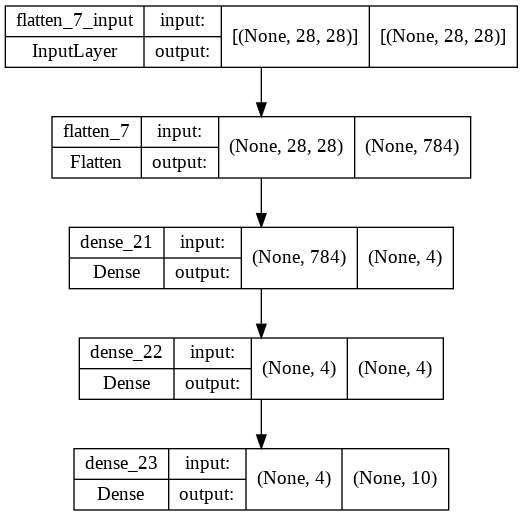

In [ ]:
# Let's check out another way of viewing our depep learning models
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)